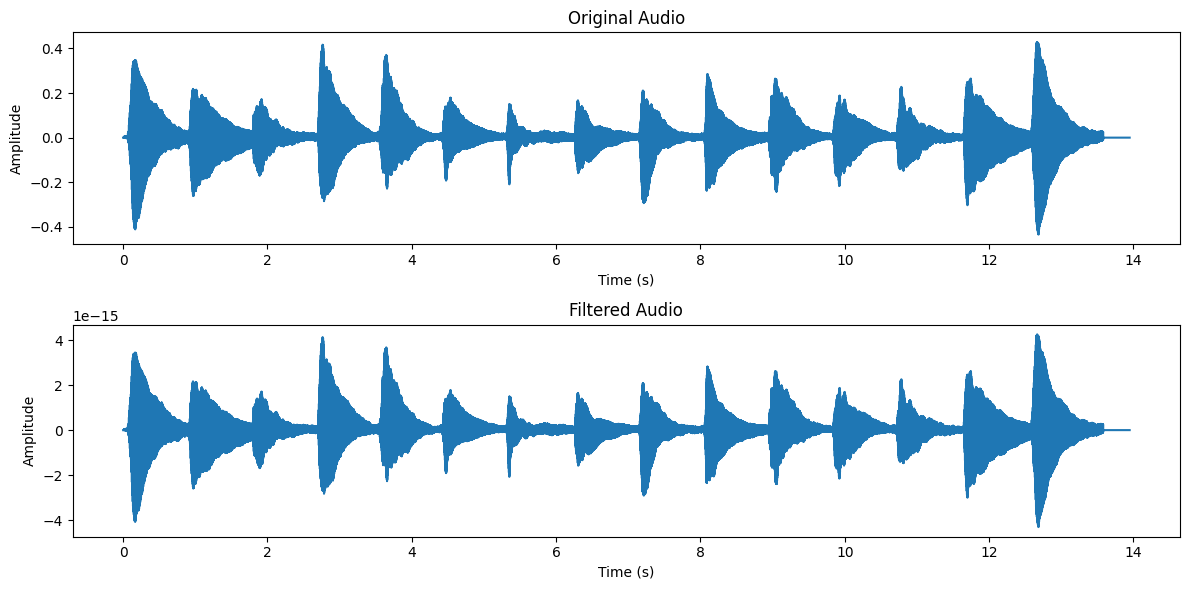

: 

In [6]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.signal import butter, sosfiltfilt
from IPython.display import Audio

# 設定要載入的音頻檔案路徑
filename = r"C:\Users\garyhu\Desktop\圓潤audio.wav"

# 載入音頻檔案
audio, sr = librosa.load(filename, sr=None)

# 定義濾波器函數
def apply_filter(audio, sr, lowcut, highcut, order=5): #order 濾波器階數，越高越準
    nyquist = 0.5 * sr #22050
    low = lowcut / nyquist
    high = highcut / nyquist   
    sos = butter(order, [low, high], btype='band', analog=False, output='sos')  #analog=False 選擇離散領域的處理方法，模擬領域效果不明顯
    filtered_audio = sosfiltfilt(sos, audio)
    return filtered_audio

# 定義要過濾的頻率範圍（這裡以增強高頻為例）
lowcut = 20  # 要去除 hz以上的低頻諧波   調整音色豐富度
highcut = 1000 # 要增強的 hz以上高頻諧波    調整音色細節

# 應用濾波器
filtered_audio = apply_filter(audio, sr, lowcut, highcut)

# 繪製原始音訊和過濾後的音訊波形圖
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(np.arange(len(audio)) / sr, audio)
plt.title('Original Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.subplot(2, 1, 2)
plt.plot(np.arange(len(filtered_audio)) / sr, filtered_audio)
plt.title('Filtered Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# 播放過濾後的音訊
Audio(filtered_audio, rate=sr)
#Audio(audio, rate=sr)
